<a href="https://colab.research.google.com/github/tc3oliver/StratLabFreq/blob/dev/MACD_Divergence_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/StratLabFreq')
os.listdir()

['data', 'TaipeiSansTCBeta-Regular.ttf', 'MACD_Divergence_Analysis.ipynb']

In [2]:
import pandas as pd

In [3]:
dataframe = pd.read_json('./data/BTC_USDT-5m.json')
dataframe.columns=['date', 'open' , 'high', 'low', 'close', 'volume' ]
dataframe['date']=(pd.to_datetime(dataframe['date'],unit='ms'))
dataframe

,date,open,high,low,close,volume
0,2017-08-17 04:00:00,4261.48,4280.56,4261.48,4261.48,2.189061
1,2017-08-17 04:05:00,4261.48,4261.48,4261.48,4261.48,0.000000
2,2017-08-17 04:10:00,4261.48,4261.48,4261.48,4261.48,0.000000
3,2017-08-17 04:15:00,4261.48,4264.88,4261.48,4261.48,0.484666
4,2017-08-17 04:20:00,4264.88,4266.29,4264.88,4266.29,2.328570
...,...,...,...,...,...,...
617219,2023-07-06 05:50:00,30549.80,30569.99,30549.80,30563.11,105.865190
617220,2023-07-06 05:55:00,30563.11,30593.64,30563.11,30582.51,71.446400
617221,2023-07-06 06:00:00,30582.50,30599.30,30573.33,30575.48,88.509370
617222,2023-07-06 06:05:00,30575.48,30575.48,30560.00,30570.04,58.483620


In [4]:
!pip install mplfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.1/73.1 kB 1.7 MB/s eta 0:00:00


In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import matplotlib.font_manager as fm
import matplotlib as mpl
import numpy as np
import statistics

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib
import talib.abstract as ta

# 下載字體
# !wget https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download -O TaipeiSansTCBeta-Regular.ttf

# 註冊字體
# font_path = 'TaipeiSansTCBeta-Regular.ttf'
# prop = fm.FontProperties(fname=font_path)
# 設定 matplotlib 字體
# mpl.rcParams['font.family'] = prop.get_name()
# font={'font.family': prop.get_name()}
# style=mpf.make_mpf_style(base_mpf_style='default', rc=font)

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4295    0  4295    0     0  11263      0 --:--:-- --:--:-- --:--:-- 11272
100  517k  100  517k    0     0   565k      0 --:--:-- --:--:-- --:--:-- 1520k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  4275    0  4275    0     0  11081      0 --:--:-- --:--:-- --:--:-- 11103
100  392k  100  392k    0     0   408k      0 --:--:-- --:--:-- --:--:--  710k


In [6]:
import random

count = 40

def get_random_count_values_dataframe(df):
    if len(df) < count:
        raise ValueError("DataFrame 中的資料數量不足 40 個")

    start_index = random.randint(0, len(df) - count)

    selected_values = df.iloc[start_index : start_index + count]

    selected_df = pd.DataFrame(selected_values)

    return selected_df

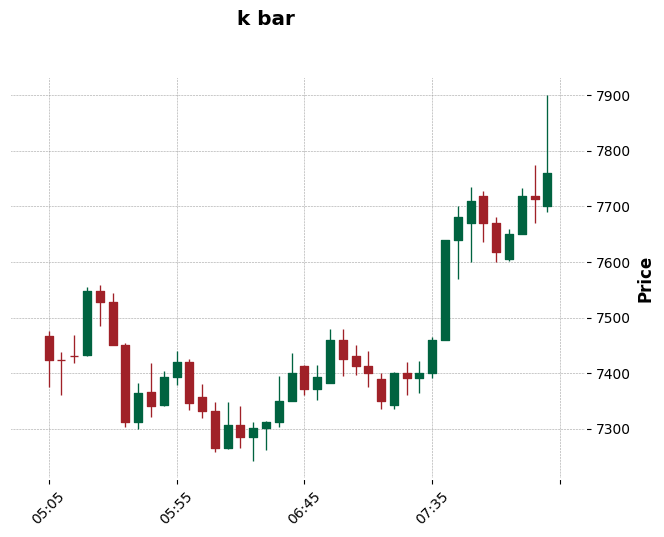

In [7]:
df = get_random_count_values_dataframe(dataframe)

# 將索引設定為 DatetimeIndex
df.set_index('date', inplace=True)

# 繪製 K 線圖
mpf.plot(df, type='candle', style='charles', title='k bar')

# 顯示圖表
plt.show()

In [8]:
macd = ta.MACD(dataframe, fastperiod=13, slowperiod=34)
dataframe['macdhist'] = macd['macdhist']

In [9]:
df = get_random_count_values_dataframe(dataframe)
df.head()

,date,open,high,low,close,volume,macdhist
576991,2023-02-16 12:10:00,24495.98,24497.39,24448.78,24471.16,1688.75575,-10.221429
576992,2023-02-16 12:15:00,24471.79,24517.21,24468.44,24514.42,1096.91679,-8.197541
576993,2023-02-16 12:20:00,24513.83,24553.66,24511.52,24525.14,1001.99156,-5.605456
576994,2023-02-16 12:25:00,24526.07,24533.89,24505.66,24512.84,704.39447,-4.331757
576995,2023-02-16 12:30:00,24511.98,24556.91,24511.51,24549.47,806.71682,-0.605348


In [10]:
# 尋找三個峰值且這些波峰連續升高
def find_peak_sequence(data):
        peaks_index = []
        wave = []

        for i in range(len(data)):
            if i == len(data) - 1:
                break
            d = abs(data[i])
            if len(wave) == 0 or d > wave[-1]:
                wave.append(d)
            else:
                if len(wave) > 1:
                    peaks_index.append(i-1)
                wave = [d]

        if len(wave) > 0:
            peaks_index.append(i)

        highlighted_points = [(index, data[index]) for index in peaks_index]

        temp = highlighted_points[-1]


        if len(highlighted_points) < 3:
            return False, []

        highlighted_points = highlighted_points[:-1]

        highlighted_points = sorted(
            highlighted_points, key=lambda x: abs(x[1]), reverse=True)[:2]
        highlighted_points = sorted(
            highlighted_points, key=lambda x: x[0], reverse=False)
        highlighted_points.append(temp)

        if len(highlighted_points) >= 3:
          # 波峰的差異
          percentage_difference = abs(abs(highlighted_points[-1][1]) - abs(highlighted_points[-3][1])) / (abs(highlighted_points[-3][1])) * 100

          # 波峰的步數
          step = abs(highlighted_points[-3][0] - highlighted_points[-1][0])

          print(percentage_difference, step)

          if percentage_difference < 50:
            return False, []

          if step < count * 0.5:
            return False, []

          if abs(highlighted_points[-3][1]) > abs(highlighted_points[-2][1]) > abs(highlighted_points[-1][1]):
            return True, highlighted_points

        return False, []



In [11]:
# dataframe['is_high_decreasing'] = dataframe['high'].rolling(window=count).apply(lambda x: (x[-1] > x[0]) & (x[-1] > max(x[:-1])), raw=True)
# 判斷高點持續提高
max_open_close = pd.Series.max(dataframe[['open', 'close']], axis=1)
dataframe['is_high_increase'] = max_open_close.rolling(window=count).apply(lambda x: (x[-1] > x[0]) & (x[-1] > max(x[:-1])), raw=True)

# 空單條件檢查 零軸以上的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_short_wrapper(data):
            if data[-1] < 0:
                return False, []
            if abs(statistics.mean(x for x in data[-3:-1])) > abs(data[-1]):
                return False, []
            count = sum(1 for value in data if value > 0)
            if count < (len(data) / 2):
                return False, []
            return find_peak_sequence([n for n in data if n > 0])

40.97992758824479 28
49.07484404753749 23
94.73193254282937 17
98.75954807384181 16
78.42543726549849 15
52.64182226896581 19
12.811596879313752 17
21.022528216755244 6
83.0884861032754 20
116.9382521762896 29
14.981394586485223 23
56.155682893356826 16
83.76283320387411 22
19.120226190267402 25
47.10465984779951 18
286.10030485957896 12
5.457744036871367 9
110.62338673606011 18
95.89410385553624 9
13.92123903613658 23
91.77704534455938 14
88.80974760777622 30
43.283139710028394 15
76.21818266505863 24
81.97373688949423 29
98.75954807384181 16
63.22320972104176 22
74.31398783837588 24
51.068817770887065 15
88.80974760777622 30
244.69913849589614 11
75.73089346019601 21
35.23548417563389 25
39.45448035434135 16
70.31146856068196 23
244.69913849589614 11
27.792185465026364 19
40.74811013156015 19
70.68838279859204 24
67.69759253065739 23
                      date      open      high       low     close     volume  \
616810 2023-07-04 19:45:00  30726.43  30743.72  30691.68  30743.72  174

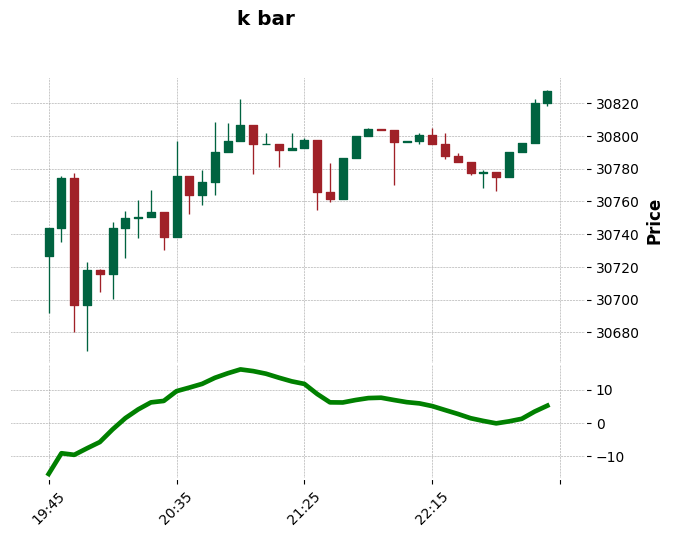

In [12]:
# 空單
while True:

  df = get_random_count_values_dataframe(dataframe[615796:])
  data = df['macdhist'].values.tolist()



  isfind, l = find_peak_sequence_short_wrapper(data)


  if isfind:
    if df['is_high_increase'].values.tolist()[-1]:
      print(df)
      print(l)
      df.set_index('date', inplace=True)

      # 建立一個 MACD histogram 的圖像
      ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

      # 繪製 K 線圖，並添加 MACD histogram
      mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

      # 顯示圖表
      plt.show()

      break

In [13]:
# dataframe['is_low_decreasing'] = dataframe['low'].rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < max(x[:-1])), raw=True)

In [14]:
# 判斷低點持續降低
min_open_close = pd.Series.min(dataframe[['open', 'close']], axis=1)
dataframe['is_low_decreasing'] = min_open_close.rolling(window=count).apply(lambda x: (x[-1] < x[0]) & (x[-1] < min(x[:-1])), raw=True)

# 多單條件檢查 零軸以下的 MACD 柱狀體應該大於 windows 的一半
def find_peak_sequence_logn_wrapper(data):
  if data[-1] > 0:
    return False, []
  count = sum(1 for value in data if value < 0)
  if count < (len(data) / 2):
      return False, []
  return find_peak_sequence(data)

90.86323866465398 30
87.89403748195389 31
41.81753526238098 29
49.038717693276894 31
69.96751649422764 38
93.28272134398094 25
32.873397949767316 35
90.29685967731935 24
89.99966019342224 34
94.54995591105632 37
68.1567170889703 38
95.54174120421372 33
5.820565680239893 35
90.40422769810569 34
74.87095018930233 25
[-0.3614416489880812, -0.507879303498286, -0.8565934013074301, -1.0228017692466622, -0.987139441809683, -0.8360367538771651, -0.8756032976293096, -0.8178658944368622, -0.9899040825976035, -0.8492731767466459, -0.8385053166182472, -0.8785837861984032, -1.1807592433066803, -1.906379308987879, -2.499106532017867, -2.422536333243333, -1.8660989754504984, -1.4211204476863375, -1.8578618966664089, -2.399048829802407, -2.239662248220813, -2.1650044126303123, -2.20528644557444, -2.346014430497527, -1.9154780284285673, -1.38140460722691, -1.341086214429616, -0.9928733903474214, -0.44452470419373213, -0.8446188960564145, -1.0890823459146173, -1.1399431818126216, -1.3398893217170178, -1

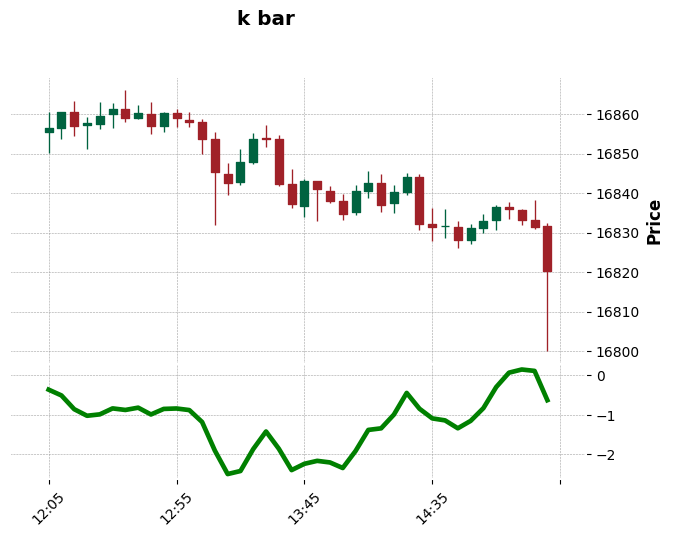

In [15]:
while True:

  df = get_random_count_values_dataframe(dataframe)
  data = df['macdhist'].values.tolist()



  isfind, l = find_peak_sequence_logn_wrapper(data)


  if isfind:

    if df['is_low_decreasing'].values.tolist()[-1]:
      print(data)
      print(l)
      df.set_index('date', inplace=True)

      # 建立一個 MACD histogram 的圖像
      ap = mpf.make_addplot(df['macdhist'], panel=1, color='g', secondary_y=False)

      # 繪製 K 線圖，並添加 MACD histogram
      mpf.plot(df, type='candle', style='charles', title='k bar', addplot=ap)

      # 顯示圖表
      plt.show()

      break